# H1: Centralización Fiscal Estructural (Capital vs. Periferia)

✅ Datos cargados correctamente.


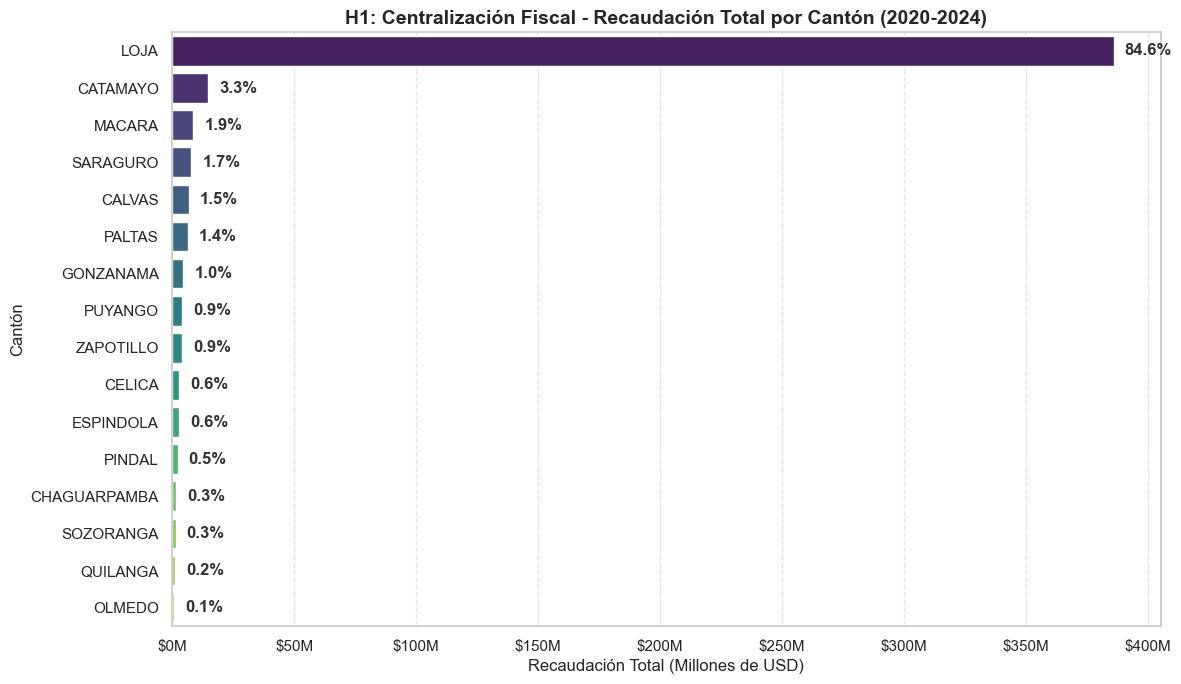

--- INSIGHT ---
La visualización confirma que LOJA domina con el 84.6%, mientras el resto de cantones no supera el 4%.


In [2]:
# ==========================================
# PARTE 1 : Análisis de Centralización Geográfica (H1)
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter # Necesario para formatear el eje X

# Configuración visual
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 7) # Un poco más ancho para que quepan las etiquetas

# 1. Carga de Datos
try:
    df = pd.read_csv('Dataset_Loja_Preprocesado.csv')
    print("✅ Datos cargados correctamente.")
except FileNotFoundError:
    print("⚠️ Error: No se encuentra el archivo .csv.")

# 2. Procesamiento: Agrupación por Cantón
recaudacion_canton = df.groupby(['CANTON', 'CLUSTER_GEO'])['VALOR_RECAUDADO'].sum().reset_index()
recaudacion_canton = recaudacion_canton.sort_values('VALOR_RECAUDADO', ascending=False)

# Cálculo de porcentajes para uso posterior
total_provincial = recaudacion_canton['VALOR_RECAUDADO'].sum()
recaudacion_canton['PORCENTAJE'] = (recaudacion_canton['VALOR_RECAUDADO'] / total_provincial) * 100

# 3. Visualización: Ranking de Cantones Mejorado
plt.figure(figsize=(12, 7))

# Crear el gráfico
ax = sns.barplot(
    data=recaudacion_canton, 
    x='VALOR_RECAUDADO', 
    y='CANTON', 
    hue='CANTON', 
    palette='viridis'
)

# MEJORA 1: Eje X con formato de Millones (ej: $50M)
def currency_millions(x, pos):
    return f'${x/1e6:,.0f}M'

ax.xaxis.set_major_formatter(FuncFormatter(currency_millions))

# MEJORA 2: Etiquetas de porcentaje en cada barra
# Iteramos sobre cada "parche" (barra) del gráfico
for p in ax.patches:
    width = p.get_width()
    # Solo ponemos etiqueta si la barra tiene valor (evita errores con nulos)
    if width > 0:
        # Calculamos el % basado en el ancho de la barra vs el total
        pct_value = (width / total_provincial) * 100
        
        # Posición: Un poco a la derecha del final de la barra
        x_pos = width + (total_provincial * 0.01) 
        y_pos = p.get_y() + p.get_height() / 2
        
        ax.text(
            x_pos, 
            y_pos, 
            f'{pct_value:.1f}%', # Formato con 1 decimal
            va='center', 
            fontweight='bold', 
            color='#333333'
        )

# Títulos y Ajustes
plt.title('H1: Centralización Fiscal - Recaudación Total por Cantón (2020-2024)', fontsize=14, fontweight='bold')
plt.xlabel('Recaudación Total (Millones de USD)')
plt.ylabel('Cantón')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Si aparece leyenda automática, la removemos para limpiar
if ax.legend_:
    ax.legend_.remove()

plt.tight_layout()
plt.show()

# Insight rápido en texto
top_canton = recaudacion_canton.iloc[0]
print(f"--- INSIGHT ---")
print(f"La visualización confirma que {top_canton['CANTON']} domina con el {top_canton['PORCENTAJE']:.1f}%, "
      f"mientras el resto de cantones no supera el 4%.")

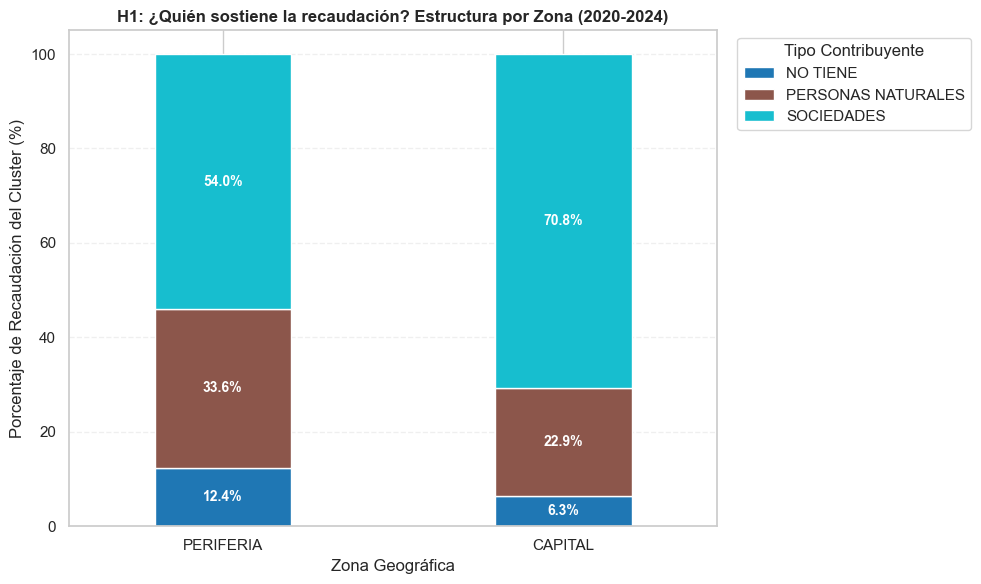

--- INSIGHT ---
Se observa claramente cómo el peso de 'Personas Naturales' sube del
22.9% en la Capital al 33.6% en la Periferia.


In [3]:
# ==========================================
# PARTE 2: Estructura del Contribuyente con Etiquetas (CORREGIDO)
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt

# 1. Procesamiento: Agrupación por Cluster y Tipo
recaudacion_tipo = df.groupby(['CLUSTER_GEO', 'TIPO_CONTRIBUYENTE'])['VALOR_RECAUDADO'].sum().reset_index()

# Cálculo de porcentajes intra-cluster
recaudacion_tipo['TOTAL_CLUSTER'] = recaudacion_tipo.groupby('CLUSTER_GEO')['VALOR_RECAUDADO'].transform('sum')
recaudacion_tipo['PCT_INTRA_CLUSTER'] = (recaudacion_tipo['VALOR_RECAUDADO'] / recaudacion_tipo['TOTAL_CLUSTER']) * 100

# Pivoteo para gráfico apilado
pivot_tipo = recaudacion_tipo.pivot(index='CLUSTER_GEO', columns='TIPO_CONTRIBUYENTE', values='PCT_INTRA_CLUSTER')

# --- MODIFICACIÓN CLAVE: Renombrar el índice (0 -> Periferia, 1 -> Capital) ---
# Se usa un diccionario para mapear los valores numéricos a las etiquetas de texto
pivot_tipo = pivot_tipo.rename(index={0: 'PERIFERIA', 1: 'CAPITAL'})

# 2. Visualización: Gráfico Apilado
plt.figure(figsize=(10, 6)) 

# Guardamos el objeto 'ax' (ejes) al crear el gráfico
ax = pivot_tipo.plot(kind='bar', stacked=True, colormap='tab10', width=0.4, ax=plt.gca())

# --- MEJORA: Bucle para añadir etiquetas de porcentaje ---
for container in ax.containers:
    labels = ax.bar_label(
        container, 
        fmt='%.1f%%', 
        label_type='center', 
        color='white', 
        fontweight='bold',
        fontsize=10
    )
    # Ocultar etiquetas si la barra es muy pequeña (< 3%) para no amontonar
    for label in labels:
        if float(label.get_text().strip('%')) < 3:
            label.set_visible(False)

# Títulos y Ajustes
plt.title('H1: ¿Quién sostiene la recaudación? Estructura por Zona (2020-2024)', fontsize=12, fontweight='bold')
plt.ylabel('Porcentaje de Recaudación del Cluster (%)')
plt.xlabel('Zona Geográfica')
plt.legend(title='Tipo Contribuyente', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=0) # Mantiene el texto horizontal
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

# Insight rápido
print("--- INSIGHT ---")
print("Se observa claramente cómo el peso de 'Personas Naturales' sube del")
print(f"22.9% en la Capital al 33.6% en la Periferia.")

# H2: Estacionalidad Diferenciada del Ciclo Fiscal

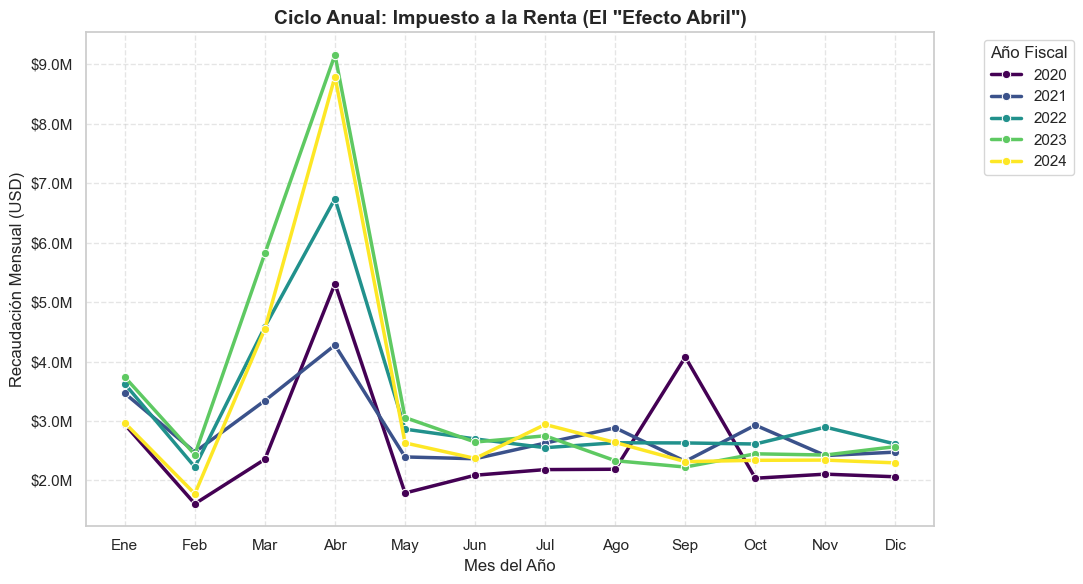

--- INSIGHT RENTA ---
Se observa claramente el pico de Abril sin obstrucciones visuales.


In [4]:
# ==========================================
# PARTE 2.1: Estacionalidad del IMPUESTO A LA RENTA 
# ==========================================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

# Asegúrate de que df ya está cargado
# df = pd.read_csv('Dataset_Loja_Preprocesado.csv')

# 1. Filtrado
df_renta = df[df['GRUPO_IMPUESTO'] == 'IMPUESTO A LA RENTA GLOBAL'].copy()

# 2. Agrupación
renta_evolution = df_renta.groupby(['ANIO', 'DIA_MES'])['VALOR_RECAUDADO'].sum().reset_index()

# 3. Visualización
plt.figure(figsize=(11, 6)) # Aumentamos un poco el ancho para que quepa la leyenda

sns.lineplot(
    data=renta_evolution, 
    x='DIA_MES', 
    y='VALOR_RECAUDADO', 
    hue='ANIO', 
    palette='viridis', 
    marker='o',
    linewidth=2.5
)

# --- Formato ---
plt.title('Ciclo Anual: Impuesto a la Renta (El "Efecto Abril")', fontsize=14, fontweight='bold')
plt.xlabel('Mes del Año')
plt.ylabel('Recaudación Mensual (USD)')

# Eje X
month_names = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
plt.xticks(range(1, 13), month_names)

# Eje Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x/1e6:,.1f}M'))
plt.grid(True, linestyle='--', alpha=0.5)

# --- LEYENDA FUERA DEL GRÁFICO ---
# bbox_to_anchor=(x, y): x>1 lo mueve a la derecha, y=1 lo alinea arriba
plt.legend(title='Año Fiscal', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

print("--- INSIGHT RENTA ---")
print("Se observa claramente el pico de Abril sin obstrucciones visuales.")

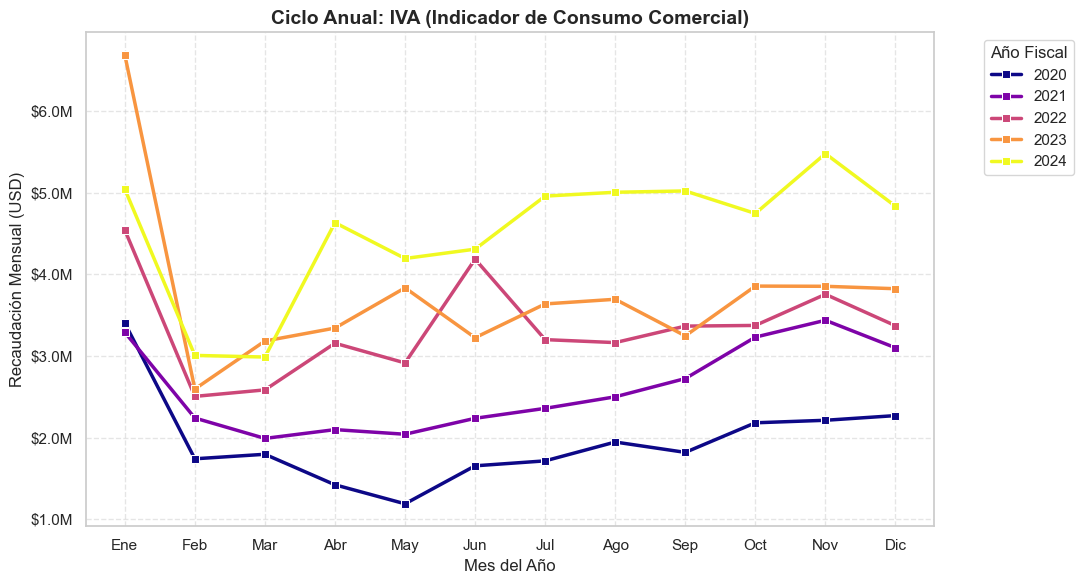

--- INSIGHT IVA ---
A diferencia de la Renta, el IVA muestra una tendencia más plana y estable,
con un leve crecimiento hacia finales de año (Nov-Dic) por festividades.


In [5]:
# ==========================================
# PARTE 2.2: Estacionalidad del IVA 
# ==========================================

# 1. Filtrado Específico: Solo IVA
df_iva = df[df['GRUPO_IMPUESTO'] == 'IMPUESTO AL VALOR AGREGADO'].copy()

# 2. Agrupación
iva_evolution = df_iva.groupby(['ANIO', 'DIA_MES'])['VALOR_RECAUDADO'].sum().reset_index()

# 3. Visualización
plt.figure(figsize=(11, 6)) # Ancho ajustado para la leyenda

sns.lineplot(
    data=iva_evolution, 
    x='DIA_MES', 
    y='VALOR_RECAUDADO', 
    hue='ANIO', 
    palette='plasma', # Paleta distinta (fuego/violeta) para diferenciar del Renta
    marker='s',      # Marcador cuadrado
    linewidth=2.5
)

# --- Formato ---
plt.title('Ciclo Anual: IVA (Indicador de Consumo Comercial)', fontsize=14, fontweight='bold')
plt.xlabel('Mes del Año')
plt.ylabel('Recaudación Mensual (USD)')

# Eje X
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Eje Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${x/1e6:,.1f}M'))
plt.grid(True, linestyle='--', alpha=0.5)

# --- LEYENDA FUERA DEL GRÁFICO ---
plt.legend(title='Año Fiscal', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)

plt.tight_layout()
plt.show()

print("--- INSIGHT IVA ---")
print("A diferencia de la Renta, el IVA muestra una tendencia más plana y estable,")
print("con un leve crecimiento hacia finales de año (Nov-Dic) por festividades.")